Matplotlib is building the font cache; this may take a moment.


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

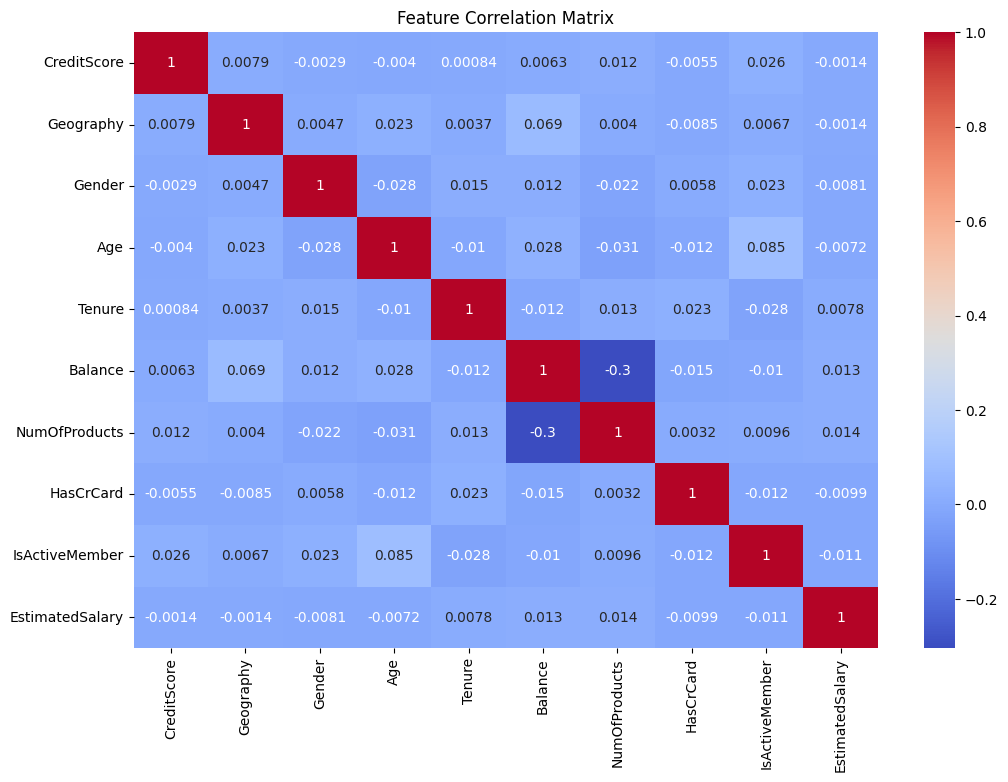

--- Logistic Regression ---
Accuracy: 0.805
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000

Confusion Matrix:
 [[1552   41]
 [ 349   58]]


--- Random Forest ---
Accuracy: 0.8645
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Confusion Matrix:
 [[1542   51]
 [ 220  187]]


--- Gradient Boosting ---
Accuracy: 0.8675
Classification Report:
               precision    recall  f1-score   suppor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Data
file_path = 'Churn_Modelling.csv'  # Specify the file path
data = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(data.head())

# Step 2: Data Preprocessing
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

# Define feature matrix X and target vector y
X = data.drop('Exited', axis=1)
y = data['Exited']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Exploratory Data Analysis (EDA)
print("Class distribution:")
print(y.value_counts(normalize=True))

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X, columns=data.columns[:-1]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Step 5: Train Models
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Step 6: Evaluate Models
def evaluate_model(model_name, y_test, y_pred):
    print(f'--- {model_name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\n')

evaluate_model('Logistic Regression', y_test, y_pred_logreg)
evaluate_model('Random Forest', y_test, y_pred_rf)
evaluate_model('Gradient Boosting', y_test, y_pred_gb)

# Optional: Perform Grid Search for Hyperparameter Tuning on the Best Model
# Let's assume Gradient Boosting performed the best in this case
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

evaluate_model('Best Gradient Boosting', y_test, y_pred_best)

# Step 7: Save Predictions
output = pd.DataFrame({'CustomerId': data['CustomerId'][X_test.index], 'Exited': y_pred_best})
output.to_csv('churn_predictions.csv', index=False)
print('Predictions saved to churn_predictions.csv')
